Include the code and the results as parts of your answers.

**Linear regression: 1 dimensional Ising model**

Download the folder data, which is next to the homework from the webpage.
In the "data.npy" you will find N=1000 configurations of the 1 dimensional classical spin chain comprising $L=40$ spins, $s_i\in\{0,1\}$ (each line corresponding to one configuration). In the "energies.npy", the energies corresponding to different configurations measured in an experiment are stored (the first element of "energies.npy" corresponds to the energy of the configuration in the first line in "data.npy"). Let us assume that the energy of configurations depends only on the pairwise interactions of spins (it can depend on the interaction of arbitrary spins, not only nearest neighbbors)
$$
E=-\sum_{i,j} J_{ij}s_i s_{j},
$$
Your quest will be to discern the values of the strengths of pair-wise interactions $\{J_{ij}\}$ between different spins.

In order to evaluate how good the prediction is, we will use the score
$$
R=1-\frac{\|y_d-y_p\|^2_2}{\|y_d-\left<y_d \right>\|^2_2},
$$
where $y_d$ is a vector of measured energies and $y_p$ is a prediction of energies by our linear model. The larger the score, the better our prediction.
The average and the square of two norm of a vector $v=[v_1,v_2,....,v_L]$ are defined as
$$
\left< v \right>=\frac{1}{L}\left(\sum_{i=1}^L v_i\right)
$$
$$
\|v\|^2_2=\left(\sum_{i=1}^L v_i^2\right).
$$
Note that in the denominator of the score $\|y_d-\left<y_d \right>\|^2_2$, the average $\left<y_d \right>$ has to be subtracted from every element of the vector.

1) Energy can be understood as a linear function of pairs of $\{s_is_{j}\}$. For each sample in "data" calculate a pair correlation matrix $M[i,j]=s_i\times s_{j}$ and turn it into vector. Energy is a linear function of pair correlations, and the interactions $\{J_{ij}\}$ are the weights which we have to determine. Implement a function which calculates the energy, given a vector of interactions/weights $\{J_{ij}\}$, and a vector of pair correlations $\{s_is_{j}\}$. Divide the data into two parts: the first half of the data is the training and the second half the test set. Implement the function which calculates the score given a vector of data $y_d$ and a vector of predictions $y_p$.

In [710]:
# Assuming that you uploaded the data to the googledrive you
# can access it by specifying the path to the data,
# going to files on the lhs, mounting the drive and
# importing the data with the numpy arrays by evaluating the cells bellow
import numpy as np
energies=np.load("./data/energies.npy")#Energies
data=np.load("./data/data.npy")#Configurations

#calculate pair correlation matrix for every sample, then flatten into a vector
pair_data= [np.array([[ spin_i*spin_j for spin_j in conf ] for spin_i in conf]).flatten() for conf in data]

In [711]:
#returns energy based on weights -J and pair correlations s_i s_j
def energy(weights, pair_correlations):
    
    return np.dot(weights, pair_correlations)

#divide data set
train_data = (pair_data[:(len(pair_data)//2)], energies[:(len(energies)//2)])
test_data = (pair_data[(len(pair_data)//2):], energies[(len(energies)//2):])

#returns score based on data y_d and predictions y_p
def score(y_d, y_p):
    
    numerator = np.sum((y_d - y_p)**2)
    denominator = np.sum((y_d - np.mean(y_d))**2)
    
    return 1 - numerator/denominator

2) Find a set of $\{J_{i,j}\}$ using an ordinary linear regression on training set (use the numpy function np.linalg.lstsq). Using this set of  $\{J_{i,j}\}$ calculate the score of predictions of our linear model for the training set, and the score of predictions for the test set.

In [712]:
#use linear regression to find weights
Js = np.linalg.lstsq(*train_data)

#score for training set
y_p = np.array([energy(Js[0], data) for data in train_data[0]])
y_d = train_data[1]
print("Training score: " + str(score(y_d, y_p)))

#score for test set
y_p = np.array([energy(Js[0], data) for data in test_data[0]])
y_d = test_data[1]
print("Test score: " +"\t"+ str(score(y_d, y_p)))

D:\Anaconda3\envs\Numerical Physics\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


Training score: 1.0
Test score: 	0.9315153230815414


3) Implement the RIDGE regression by using use np.linalg.solve() and plot the score of training set and test set as a function of regularization $\lambda$ for $\lambda=\{0.001,0.01,0.1,1,10,100,1000,10000\}$.

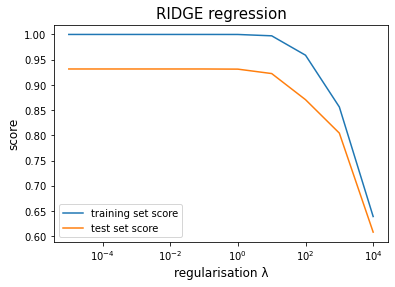

In [713]:
#regularisations to be used
λs = [10**(-5+i) for i in range(10)]
Js_reg = []
test_scores = []
training_scores = []

#chain length
L1=40

#set up linear matrix equation
for λ in λs:
    
    #print("Choice of λ: " + str(λ))
    
    features = np.array(train_data[0])
    labels = np.array(train_data[1])

    a = np.dot(features.T, features) + λ*np.identity(L1**2)
    b = np.dot(features.T, labels)

    
    Js_reg.append(np.linalg.solve(a,b))
    
    #score for training set
    y_p = np.array([energy(Js_reg[-1], data) for data in train_data[0]])
    y_d = train_data[1]
    training_scores.append(score(y_d, y_p))
    #print("Training score: " + str(score(y_d, y_p)))
    

    #score for test set
    y_p = np.array([energy(Js_reg[-1], data) for data in test_data[0]])
    y_d = test_data[1]
    test_scores.append(score(y_d, y_p))
    #print("Test score: " +"\t"+ str(score(y_d, y_p)) +"\n")


plt.semilogx(λs, training_scores, label="training set score")
plt.semilogx(λs, test_scores, label="test set score")
plt.title("RIDGE regression", fontsize="15")
plt.xlabel("regularisation λ", fontsize="12")
plt.ylabel("score", fontsize="12")
plt.legend()
plt.show()

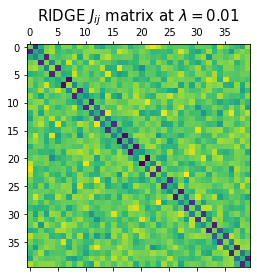

In [775]:
J_ridge = Js_reg[2]

J_ridge = J_ridge.reshape(L1,L1)
plt.matshow(J_ridge)
plt.title("RIDGE $J_{ij}$ matrix at $\lambda = 0.01$", fontsize="15")
plt.show()

4) Use the LASSO regression from sklearn (linear_model.Lasso()) and do the same as in point 3. Plot the matrix of $J_{ij}$  for what you consider to be a good $\lambda$. How do you understand the performance of different methods?

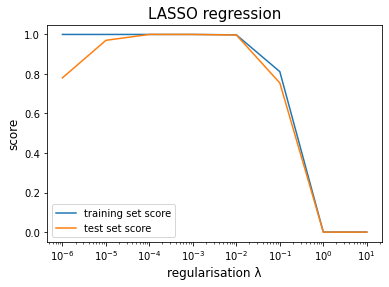

In [714]:
from sklearn.linear_model import Lasso

λs = [10**(-6+i) for i in range(8)]

test_scores_L = []
training_scores_L = []

for λ in λs:
    #set up LASSO regression for λ
    clf = Lasso(alpha=λ, max_iter=3000)

    clf.fit(*train_data)
    # compute accuracy
    test_scores_L.append(clf.score(*test_data))
    training_scores_L.append(clf.score(*train_data))

plt.semilogx(λs, training_scores_L, label="training set score")
plt.semilogx(λs, test_scores_L, label="test set score")
plt.title("LASSO regression", fontsize="15")
plt.xlabel("regularisation λ", fontsize="12")
plt.ylabel("score", fontsize="12")
plt.legend()
plt.show()

#higher sparcity with LASSO?

We find a maximum for the test score at $\lambda = 0.001$, therefore we consider this to be a good $\lambda$.

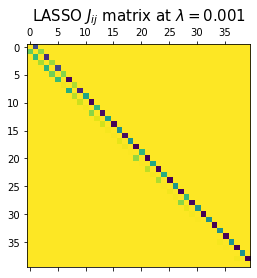

In [774]:
#plot J at λ=0.001
clf = Lasso(alpha=0.001, max_iter=3000)
clf.fit(*train_data)

J_ij = clf.coef_

J_ij = J_ij.reshape(L1,L1)
plt.matshow(J_ij)
plt.title("LASSO $J_{ij}$ matrix at $\lambda = 0.001$", fontsize="15")
plt.show()

LASSO regression reaches higher test scores than RIDGE regression, because it trains a very sparse matrix if we choose a good value for $\lambda$. As we can see in the plot for $J_{ij}$, the matrix trained with LASSO closely mimics the nearest neighbour interactions we are trying to model.

Comparing RIDGE and LASSO regression, the difference in performance is clearly due to the higher sparsity in the case of LASSO regularisation.

**Learning about the configurations of the 2D Ising chain**

Now consider a 2D nearest neighbor Ising model on the square lattice of $28\times 28$ spins
$$
E(\{\sigma\})=-\sum_{\langle ij \rangle} s_i s_j
$$
where again $s_i\in\{0,1\}$, and ${\langle ij \rangle}$ are the nearest neighbor spins.

5) Use the Wolff's algorithm to produce a training sample comprising N=10000 2D Ising configurations at the temperature $T=2.5$ (you can addapt the code from the excercises). 

Suggestion: Do enough steps of MC between the two collected configurations in order to avoid correlations, and run the Wolff's algorithm for enough steps before you start collecting the data so that you are collecting configurations corresponding to $T=2.5$.

In [716]:
import random
import math



#Wolff algorithm from tutorial 4
#generate N_samples number of samples
#run N_ini iterations at first, to get correct temperature
#then N_it for every new sample after that
def Wolff(L,N_ini,N_it,N_samples,beta, shuffle=True):
    N=L*L
    S = [random.choice([-1, 1]) for k in range(N)]
    p = 1.0 - math.exp(-2.0 * beta)
    nbr, site_dic, x_y_dic = square_neighbors(L)
    m=0
    m2=0
    
    configurations = []
    
    for iter in range(N_ini):
        k = random.randint(0, N - 1)
        Pocket = [k]
        Cluster = [k]
        N_cluster =1
        while Pocket != []:
            k = random.choice(Pocket)
            for l in nbr[k]:
                if S[l] == S[k] and l not in Cluster and random.uniform(0,1) < p:
                    Pocket.append(l)
                    Cluster.append(l)
                    N_cluster += 1
            Pocket.remove(k)
        for k in Cluster: 
            S[k] = - S[k]
    
    #save first sample
    #fix spins [-1,1] -> [0,1]
    configurations.append([(s+1)/2 for s in S])
    
    for sample in range(N_samples-1):
    
        for iter in range(N_it):
            k = random.randint(0, N - 1)
            Pocket = [k]
            Cluster = [k]
            N_cluster =1
            while Pocket != []:
                k = random.choice(Pocket)
                for l in nbr[k]:
                    if S[l] == S[k] and l not in Cluster and random.uniform(0,1) < p:
                        Pocket.append(l)
                        Cluster.append(l)
                        N_cluster += 1
                Pocket.remove(k)
            for k in Cluster: 
                S[k] = - S[k]
            
        #save the other (N_samples - 1) samples
        #fix spins [-1,1] -> [0,1]
        configurations.append([(s+1)/2 for s in S])
    
    #randomise
    if shuffle == True:
        np.random.shuffle(configurations)
        
    return configurations


def square_neighbors(L):
    N = L * L
    site_dic = {}
    x_y_dic = {}
    for j in range(N):
        row = j // L
        column = j - row * L
        site_dic[(row, column)] = j
        x_y_dic[j] = (row, column)
        nbr = []
    for j in range(N):
        row, column = x_y_dic[j]
        right_nbr = site_dic[row, (column + 1) % L]
        up_nbr = site_dic[(row + 1) % L, column]
        left_nbr = site_dic[row, (column - 1 + L) % L]
        down_nbr = site_dic[(row - 1 + L) % L, column]
        nbr.append((right_nbr, up_nbr, left_nbr, down_nbr))
    nbr = tuple(nbr)
    return nbr, site_dic, x_y_dic




In [717]:
#square lattice, side length L
L = 28

#temperature
T = 2.5

#number of samples
N_samples = 10000

N_ini = 10000
N_it = 100
beta = 1/T
configurations = np.array(Wolff(L, N_ini, N_it, N_samples, beta))

6) Train the RBM on the Ising data. Plot the weights associated with the hidden variables, and plot what happens to a random state after 1000 steps of the heat-bath MC (the one used in CD) with the learned model. Comment on the results.

In [718]:
#train RBM
from collections import defaultdict
import time

#reg to avoid over/underflow, prob not needed here
def reg(num):
    num = np.where(num < -20, -20, num)
    num = np.where(num > 20, 20, num)
    return num

#probability for activations
def p(weights, h_bias, configuration):
    
    #avoid over/underflows by reg
    return 1/(1 + np.exp(- reg(np.dot(weights,configuration) + h_bias)))

#heat bath Monte Carlo algorithm 
def heat_bath_MC(v, weights, v_bias, h_bias, steps):
    n_h = weights.shape[0]
    n_v = weights.shape[1]
    h = np.zeros(n_h)
    
    for i in range(steps):
        h = np.floor(p(weights, h_bias, v)-np.random.random(n_h)+1)
        v = np.floor(p(weights.T, v_bias, h)-np.random.random(n_v)+1)
        
    return v

#one epoch run
def run_epoch(configurations, weights, v_bias, h_bias, Nb, bs, learning_rate, k):
    
    n_h = weights.shape[0]
    n_v = weights.shape[1]
    
    for batch in range(Nb):

        d_weights = np.zeros((n_h,n_v))
        d_v_bias = np.zeros(n_v)
        d_h_bias = np.zeros(n_h)

        for sample in range(bs):

            #take training sample for v, generate h
            v = configurations[batch*bs + sample]
            h = p(weights, h_bias, v)
            x_d = np.outer(h,v)

            #sample v' by means of heat bath
            vp = heat_bath_MC(v, weights, v_bias, h_bias, k)
            hp = p(weights, h_bias, vp)
            x_m = np.outer(hp,vp)

            #weight change
            d_weights = d_weights + learning_rate*(x_d - x_m)
            d_v_bias = d_v_bias + learning_rate*(v - vp)
            d_h_bias = d_h_bias + learning_rate*(h - hp)

        #update weights, average over batch
        weights = weights + d_weights
        v_bias = v_bias + d_v_bias
        h_bias = h_bias + d_h_bias
        
    return weights, v_bias, h_bias

# avoiding divergencess in log for h
def epsilon(num):
    if num<0.01:
        num=0.01
    elif 1-num<0.01:
        num=0.99
    return num

#train the whole thing
def train(configurations, parameters, weights_bias, output=True):
    
    print("===================================  training  ===================================")
    print("parameters: " + str(parameters) + "\n")

    weights, v_bias, h_bias = weights_bias['weights'], weights_bias['v_bias'], weights_bias['h_bias']
    Nb, bs, learning_rate, k = parameters['Nb'], parameters['bs'], parameters['w'], parameters['k']

    for epoch in range(parameters['epochs']):
        
        if output==True:
            print("===================================  " + str(epoch+1) + ". epoch  ===================================")
        
        weights, v_bias, h_bias = run_epoch(configurations, weights, v_bias, h_bias, Nb, bs, learning_rate, k)
    
    #return trained weights and biases
    tr_weights_bias = defaultdict(list)
    tr_weights_bias['weights'], tr_weights_bias['v_bias'], tr_weights_bias['h_bias'] = weights, v_bias, h_bias
    print("\n===================================  complete  ===================================")
    
    return tr_weights_bias

#calculate energies
def moving_average_energy(configurations, weights_biases, parameters, N_heat, output=True):
    energy = 0
    energies = []
    
    weights, v_bias, h_bias = weights_biases['weights'], weights_biases['v_bias'], weights_biases['h_bias']

    #initialise random initial state
    v = np.random.randint(2, size=parameters['n_v'])

    for i in range(N_heat):

        #calculate energy
        s = [(2*spin)-1 for spin in v]
        neighbours, site_dic, x_y_dic = square_neighbors(L)
        energy+= np.sum([[-spin*s[neighbour] for neighbour in neighbours[j]] for j, spin in enumerate(s)])
        #fix double counting
        energies.append(energy/(2*(i+1)))

        #update state
        v = heat_bath_MC(v, weights, v_bias, h_bias, 1)


    #get average over training samples
    e_training = 0

    for sample in configurations:
            s = [(2*spin)-1 for spin in sample]
            e_training+= np.sum([[-spin*s[neighbour] for neighbour in neighbours[j]] for j, spin in enumerate(s)])
    
    #fix double counting
    e_training /= 2*len(configurations)
    
    e_results = defaultdict(list)
    e_results['running average'], e_results['sample average'], e_results['N_heat'] = energies, e_training, N_heat
    
    if output == True:
        print("\nEnergy error after " + str(N_heat) + " heat bath steps: " + str(energies[-1] -  e_training) + "\n")
    
    return e_results

#plot results
def plot_results(parameters, energies):
    
    plt.plot(range(energies['N_heat']), energies['running average'], label="moving average")
    plt.hlines(energies['sample average'], 0, energies['N_heat'],
               color="red", linestyle="dashed", label="average over training samples")
    
    plt.title("Moving energy average", fontsize="15")
    plt.ylabel("Energy", fontsize="12")
    plt.xlabel("Number of heat bath steps", fontsize="12")
    plt.legend()
    plt.show()

#initialise RBM before training
def initialise(parameters, configurations):
    
    #initialise weights/couplings J using normal distribution, and biases/fields here
    ps=np.array([epsilon(np.mean([conf[i] for conf in configurations])) for i in range(parameters['n_v'])]) 
    v_bias=np.log(ps/(1-ps)) # The biases are set to log(p_i/(1-p_i))
    h_bias=np.array([-4. for _ in range(parameters['n_h'])]) # We set htilde negative in order to encourage sparsness
    weights = np.random.normal(0,parameters['sigmaJ'],(parameters['n_h'],parameters['n_v']))

    return weights, v_bias, h_bias


#sanity check, will overfitting or high w result in strong fluctuations for multiple heat bath runs?
def sanity_check(parameters, weights_biases, configurations, iterations=15):
    
    print("\nSanity check for learning rate: w = " + str(parameters['w']) 
          + ", rate = " + str(parameters['w'] * parameters['bs']))
    
    offsets = []
    
    for i in range(iterations):
        energy_dict = moving_average_energy(configurations, weights_biases, parameters, N_heat=3000, output=False)
        offsets.append(energy_dict['running average'][-1] - energy_dict['sample average'])
    
    offset_av = np.mean(offsets)
    offset_er = np.std(offsets)
    print("averge energy offset: " + str(offset_av) + chr(177) + str(offset_er) + "\n")
    
    sanity = defaultdict(list)
    sanity['offset average'], sanity['offset error'] = offset_av, offset_er
    
    return sanity

In [719]:
#save parameters
RBM_parameters = []

#save weights and biases
RBM_weights_biases = []

#save run times
RBM_time = []

#save energies
RBM_energies = []

#measure and save fluctuations across multiple heat bath runs to asses sanity of RBMs
RBM_sanity = []

In [720]:
#first RBM training
start = time.process_time()

#save parameters
bs = 20
parameters = {'n_v':28**2, 'n_h':500, 'bs':20, 'Nb':int(N_samples/bs), 'epochs':15, 'w':0.1/(bs), 'sigmaJ':0.1, 'k':3}
RBM_parameters.append(parameters)

#initialise
weights_biases = defaultdict(list)
weights_biases['weights'], weights_biases['v_bias'], weights_biases['h_bias'] = initialise(parameters, configurations)

#save trained weights and biases
RBM_weights_biases.append(train(configurations, parameters, weights_biases))

#save training time
RBM_time.append(time.process_time() - start)

#save energies
RBM_energies.append(moving_average_energy(configurations, RBM_weights_biases[0], RBM_parameters[0], N_heat=3000))

#sanity check
RBM_sanity.append(sanity_check(RBM_parameters[0], RBM_weights_biases[0], configurations))

print("\nHow long the process took (system + CPU user time): " + str((time.process_time() - start)/60) + " min")

===================================  training  ===================================
parameters: {'n_v': 784, 'n_h': 500, 'bs': 20, 'Nb': 500, 'epochs': 15, 'w': 0.005, 'sigmaJ': 0.1, 'k': 3}

===================================  1. epoch  ===================================
===================================  2. epoch  ===================================
===================================  3. epoch  ===================================
===================================  4. epoch  ===================================
===================================  5. epoch  ===================================
===================================  6. epoch  ===================================
===================================  7. epoch  ===================================
===================================  8. epoch  ===================================
===================================  9. epoch  ===================================
===================================  10. epoch  ==============

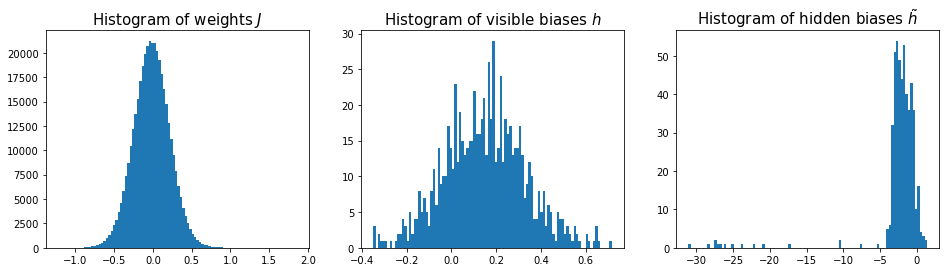

In [721]:
#plot the weights associated with the hidden variables
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
ax1.set_title(r"Histogram of weights $J$", fontsize="15")
ax1.hist(RBM_weights_biases[0]['weights'].reshape(500*784,1), 100)
ax2.set_title(r"Histogram of visible biases $h$", fontsize="15")
ax2.hist(RBM_weights_biases[0]['v_bias'], 100)
ax3.set_title(r"Histogram of hidden biases $\tilde{h}$", fontsize="15")
ax3.hist(RBM_weights_biases[0]['h_bias'], 100)

plt.show()

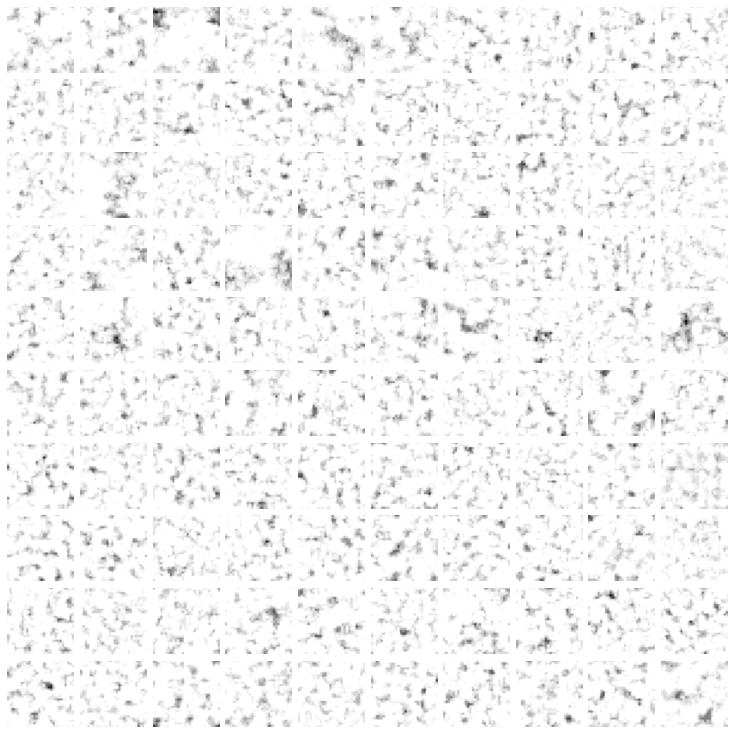

In [722]:
#plot weight matrices
weight_matrices = RBM_weights_biases[0]['weights']

def pljt(samples):
    dim=10
    vmin=np.amin(samples)
    vmax=np.amax(samples)
    fig_width = 10.
    fig_height = 10.
    f, pix = plt.subplots(dim,dim, figsize=(fig_width, fig_height))
    for i in range(dim):
        for j in range(dim):
            pix[i, j].imshow(samples[i][j],cmap='Greys', vmin=0, vmax=1)
            pix[i, j].axis('off')
    plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0, right=1, bottom=0, top=1)
    plt.show()
    
sample=[[[[weight_matrices[10*k1+k2][j*28+i] for i in range(28)] for j in range(28)] for k1 in range(10)] for k2 in range(10)]
pljt(sample)

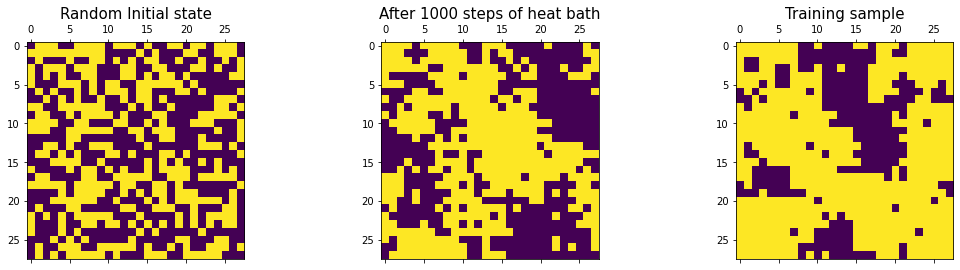

In [771]:
#plot what happens to a random state after 1000 heat bath steps with the learned model
N_heat = 1000

#random initial state
n_v = RBM_parameters[0]['n_v']
weights = RBM_weights_biases[0]['weights']
v_bias, h_bias = RBM_weights_biases[0]['v_bias'], RBM_weights_biases[0]['h_bias']
v_ini = np.random.randint(2, size=n_v)
v = heat_bath_MC(v_ini, weights, v_bias, h_bias, N_heat)

v_ini2 = [[v_ini[i*L +j] for j in range(L)] for i in range(L)]
v2 = [[v[i*L +j] for j in range(L)] for i in range(L)]
v_training = configurations[1]
v_training2 = [[v_training[i*L +j] for j in range(L)] for i in range(L)]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,4))

ax1.matshow(v_ini2)
ax1.set_title("Random Initial state", fontsize="15")

ax2.matshow(v2)
ax2.set_title("After " + str(N_heat) + " steps of heat bath", fontsize="15")

ax3.matshow(v_training2)
ax3.set_title("Training sample", fontsize="15")

plt.show()

We go from a completely disordered inital state to a state where ordered domains are easily recognisable and this is the expected result, because we are close to the critical temperature $T_c \approx 2.27$ (temperature region where Wolff's algorithm is most efficient).

It appears that the learned weights and biases actually reflect the correct tendency towards order in the physical behaviour of the system, but the system should tend even more strongly towards order. This conclusion is based on the plot of a training sample, which is clearly more ordered and consequently features a smaller energy than we achieve after 1000 heat bath steps with the learned RBM weights.

7) Starting from a single random initial configuration, run the heat-bath MC (the one used in CD) with the learned model and after every step of heat-bath MC, calculate the moving average of energies of configurations (i.e. the average of energies of all the produced configurations to that point), accordingly to the original model. Run the HBMC for ~3000 steps. Compare it to the average of the energies of the training sample.

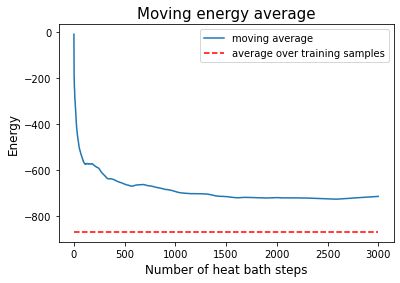

In [724]:
plot_results(RBM_parameters[0], RBM_energies[0])

This plot confirms the suspicion raised in the previous task, the energies we obtain using the trained model are too high. A random initial state does not thermalise properly towards the temperature $T=2.5$ we trained at, not even after 3000 heat bath steps.

8) Check how the asymptotic value of energy depends on the number of learning samples (increase N), learning weight, number of epochs, and number of hidden variables.

In [725]:
#generate more samples, 20000 in total
N_ini = 10000
N_it = 100
beta = 1/T
configurations2 = np.concatenate((configurations, Wolff(L, N_ini, N_it, N_samples, beta)))

N_samples2 = 2*N_samples

In [736]:
#second round RBM training, vary number of samples, here 5000, 7500, 12500, 15000, 17500 and 20000

N_is = [5000, 7500, 12500, 17500, 20000]

for N_i in N_is:
    
    start = time.process_time()

    #save parameters
    bs = 20
    parameters = {'n_v':28**2, 'n_h':500, 'bs':20, 'Nb':int(N_i/bs), 'epochs':15, 'w':0.1/(bs), 'sigmaJ':0.1, 'k':3}
    RBM_parameters.append(parameters)

    #initialise
    weights_biases = defaultdict(list)
    weights_biases['weights'], weights_biases['v_bias'], weights_biases['h_bias'] = initialise(parameters, configurations)

    #save trained weights and biases
    RBM_weights_biases.append(train(configurations2, parameters, weights_biases, output=False))

    #save training time
    RBM_time.append(time.process_time() - start)

    #save energies
    RBM_energies.append(moving_average_energy(configurations, RBM_weights_biases[-1], RBM_parameters[-1], N_heat=3000))

    #sanity check
    RBM_sanity.append(sanity_check(RBM_parameters[-1], RBM_weights_biases[-1], configurations))

    print("\nHow long the process took (system + CPU user time): " + str((time.process_time() - start)/60) + " min")

===================================  training  ===================================
parameters: {'n_v': 784, 'n_h': 500, 'bs': 20, 'Nb': 250, 'epochs': 15, 'w': 0.005, 'sigmaJ': 0.1, 'k': 3}


===================================  complete  ===================================

Energy error after 3000 heat bath steps: 178.23040000000003


Sanity check for learning rate: w = 0.005, rate = 0.1
averge energy offset: 187.4652444444445±20.56020571660548


How long the process took (system + CPU user time): 85.68723958333334 min
===================================  training  ===================================
parameters: {'n_v': 784, 'n_h': 500, 'bs': 20, 'Nb': 375, 'epochs': 15, 'w': 0.005, 'sigmaJ': 0.1, 'k': 3}


===================================  complete  ===================================

Energy error after 3000 heat bath steps: -108.29759999999999


Sanity check for learning rate: w = 0.005, rate = 0.1
averge energy offset: -48.460799999999956±64.92209471858475


How long the proces

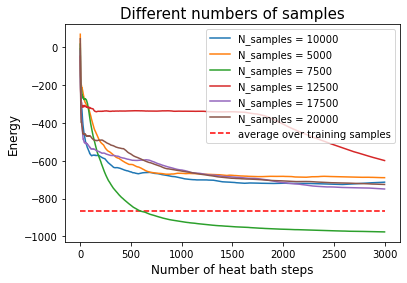

In [737]:
#plot comparison for number of samples used
plt.title("Different numbers of samples", fontsize="15")

for i in range(6):
    plt.plot(range(RBM_energies[i]['N_heat']), RBM_energies[i]['running average'],
         label="N_samples = " + str(RBM_parameters[i]['Nb'] * RBM_parameters[i]['bs']))

plt.hlines(RBM_energies[0]['sample average'], 0, RBM_energies[0]['N_heat'],
           color="red", linestyle="dashed", label="average over training samples")
plt.ylabel("Energy", fontsize="12")
plt.xlabel("Number of heat bath steps", fontsize="12")
plt.legend()

plt.show()

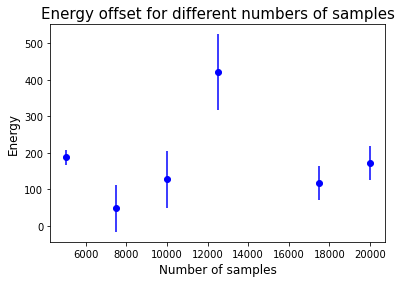

In [751]:
#plot average energy offset (modulus) after 3000 heat bath steps
plt.title("Energy offset for different numbers of samples", fontsize="15")

for i in range(6):
    plt.errorbar(RBM_parameters[i]['Nb'] * RBM_parameters[i]['bs'], np.abs(RBM_sanity[i]['offset average']), 
                yerr=RBM_sanity[i]['offset error'], fmt="o", color="blue")

plt.ylabel("Energy", fontsize="12")
plt.xlabel("Number of samples", fontsize="12")

plt.show()

Changing the number of training samples while keeping the other parameters fixed shows us that the energy fluctuations are acceptable for high numbers of samples and very low numbers of samples,

In [752]:
#third round RBM training, vary the learning rate at 10000 samples

ϵs = [1, 0.5, 0.05, 0.01, 0.005]

for ϵ in ϵs:

    start = time.process_time()

    #save parameters
    bs=20
    parameters = {'n_v':28**2, 'n_h':500, 'bs':bs, 'Nb':int(N_samples/bs), 'epochs':15, 'w':ϵ/bs, 'sigmaJ':0.1, 'k':3}
    RBM_parameters.append(parameters)

    #initialise weights/couplings J using normal distribution, and biases/fields here
    weights_biases = defaultdict(list)
    weights_biases['weights'], weights_biases['v_bias'], weights_biases['h_bias'] = initialise(parameters, configurations)

    #save trained weights and biases
    RBM_weights_biases.append(train(configurations, parameters, weights_biases, output=False))

    #save training time
    RBM_time.append(time.process_time() - start)

    #save energies
    RBM_energies.append(moving_average_energy(configurations, RBM_weights_biases[-1], RBM_parameters[-1], N_heat=3000))

    print("\nHow long the process took (system + CPU user time): " + str((time.process_time() - start)/60) + " min")




===================================  training  ===================================
parameters: {'n_v': 784, 'n_h': 500, 'bs': 20, 'Nb': 500, 'epochs': 15, 'w': 0.05, 'sigmaJ': 0.1, 'k': 3}


===================================  complete  ===================================

Energy error after 3000 heat bath steps: 864.1064


How long the process took (system + CPU user time): 151.059375 min
===================================  training  ===================================
parameters: {'n_v': 784, 'n_h': 500, 'bs': 20, 'Nb': 500, 'epochs': 15, 'w': 0.025, 'sigmaJ': 0.1, 'k': 3}


===================================  complete  ===================================

Energy error after 3000 heat bath steps: 205.85973333333334


How long the process took (system + CPU user time): 162.84453125 min
===================================  training  ===================================
parameters: {'n_v': 784, 'n_h': 500, 'bs': 20, 'Nb': 500, 'epochs': 15, 'w': 0.0025, 'sigmaJ': 0.1, 'k': 3}


======

In [754]:
for i in range(6,11):
    RBM_sanity.append(sanity_check(RBM_parameters[i], RBM_weights_biases[i], configurations))



Sanity check for learning rate: w = 0.05, rate = 1.0
averge energy offset: 863.4291555555557±0.8176753269158304


Sanity check for learning rate: w = 0.025, rate = 0.5
averge energy offset: 409.60346666666675±146.23068200494927


Sanity check for learning rate: w = 0.0025, rate = 0.05
averge energy offset: 88.0116444444445±10.473393885861213


Sanity check for learning rate: w = 0.0005, rate = 0.01
averge energy offset: 340.6704888888889±5.087804502805264


Sanity check for learning rate: w = 0.00025, rate = 0.005
averge energy offset: 426.28240000000005±3.265938385937611



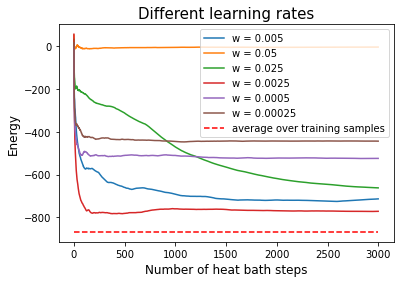

In [755]:
#plot comparison for number of samples used
plt.title("Different learning rates", fontsize="15")

plt.plot(range(RBM_energies[0]['N_heat']), RBM_energies[0]['running average'],
         label="w = " + str(RBM_parameters[0]['w']))

for i in range(6,11):
    plt.plot(range(RBM_energies[i]['N_heat']), RBM_energies[i]['running average'],
         label="w = " + str(RBM_parameters[i]['w']))

plt.hlines(RBM_energies[0]['sample average'], 0, RBM_energies[0]['N_heat'],
           color="red", linestyle="dashed", label="average over training samples")
plt.ylabel("Energy", fontsize="12")
plt.xlabel("Number of heat bath steps", fontsize="12")
plt.legend()

plt.show()

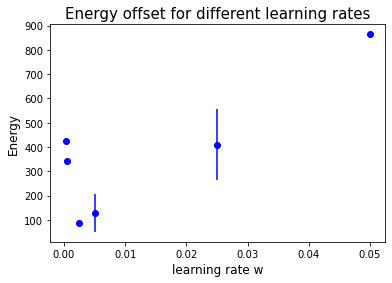

In [758]:
#plot average energy offset (modulus) after 3000 heat bath steps
plt.title("Energy offset for different learning rates", fontsize="15")

plt.errorbar(RBM_parameters[0]['w'], np.abs(RBM_sanity[0]['offset average']), 
                yerr=RBM_sanity[0]['offset error'], fmt="o", color="blue")

for i in range(6, 11):
    plt.errorbar(RBM_parameters[i]['w'], np.abs(RBM_sanity[i]['offset average']), 
                yerr=RBM_sanity[i]['offset error'], fmt="o", color="blue")

plt.ylabel("Energy", fontsize="12")
plt.xlabel("learning rate w", fontsize="12")

plt.show()

We see a minimum for $w=0.0025 = 0.05/bs$, a slightly smaller learning rate than the one we used initially.

In [759]:
#fourth round of training, vary number of epochs

epoch_nums = [5, 10, 20, 50, 100]
    
for epoch_num in epoch_nums:
    
    start = time.process_time()

    #save parameters
    bs=20
    parameters = {'n_v':28**2, 'n_h':500, 'bs':bs, 'Nb':int(N_samples/bs), 'epochs':epoch_num, 'w':0.1/bs, 'sigmaJ':0.1, 'k':3}
    RBM_parameters.append(parameters)

    #initialise weights/couplings J using normal distribution, and biases/fields here
    weights_biases = defaultdict(list)
    weights_biases['weights'], weights_biases['v_bias'], weights_biases['h_bias'] = initialise(parameters, configurations)

    #save trained weights and biases
    RBM_weights_biases.append(train(configurations, parameters, weights_biases, output=False))

    #save training time
    RBM_time.append(time.process_time() - start)

    #save energies
    RBM_energies.append(moving_average_energy(configurations, RBM_weights_biases[-1], RBM_parameters[-1], N_heat=3000))
    
    #sanity check
    RBM_sanity.append(sanity_check(RBM_parameters[-1], RBM_weights_biases[-1], configurations))

    print("\nHow long the process took (system + CPU user time): " + str((time.process_time() - start)/60) + " min")


===================================  training  ===================================
parameters: {'n_v': 784, 'n_h': 500, 'bs': 20, 'Nb': 500, 'epochs': 5, 'w': 0.005, 'sigmaJ': 0.1, 'k': 3}


===================================  complete  ===================================

Energy error after 3000 heat bath steps: 203.8664


Sanity check for learning rate: w = 0.005, rate = 0.1
averge energy offset: 99.21840000000005±18.144993016134098


How long the process took (system + CPU user time): 64.79036458333333 min
===================================  training  ===================================
parameters: {'n_v': 784, 'n_h': 500, 'bs': 20, 'Nb': 500, 'epochs': 10, 'w': 0.005, 'sigmaJ': 0.1, 'k': 3}


===================================  complete  ===================================

Energy error after 3000 heat bath steps: 493.9997333333334


Sanity check for learning rate: w = 0.005, rate = 0.1
averge energy offset: 408.77040000000005±119.32839381856489


How long the process took (syst

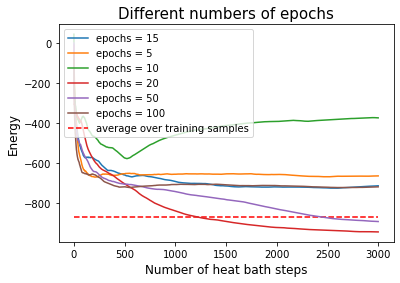

In [770]:
plt.title("Different numbers of epochs", fontsize="15")

plt.plot(range(RBM_energies[0]['N_heat']), RBM_energies[0]['running average'],
         label="epochs = " + str(RBM_parameters[0]['epochs']))

for i in range(11,16):
    plt.plot(range(RBM_energies[i]['N_heat']), RBM_energies[i]['running average'],
         label="epochs = " + str(RBM_parameters[i]['epochs']))

plt.hlines(RBM_energies[0]['sample average'], 0, RBM_energies[0]['N_heat'],
           color="red", linestyle="dashed", label="average over training samples")
plt.ylabel("Energy", fontsize="12")
plt.xlabel("Number of heat bath steps", fontsize="12")
plt.legend()

plt.show()

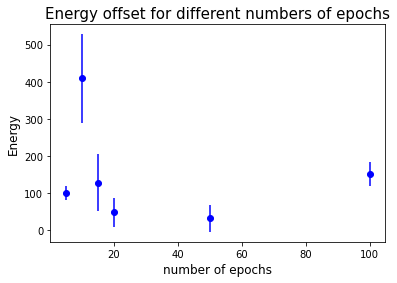

In [769]:
plt.title("Energy offset for different numbers of epochs", fontsize="15")

plt.errorbar(RBM_parameters[0]['epochs'], np.abs(RBM_sanity[0]['offset average']), 
                yerr=RBM_sanity[0]['offset error'], fmt="o", color="blue")

for i in range(11, 16):
    plt.errorbar(RBM_parameters[i]['epochs'], np.abs(RBM_sanity[i]['offset average']), 
                yerr=RBM_sanity[i]['offset error'], fmt="o", color="blue")

plt.ylabel("Energy", fontsize="12")
plt.xlabel("number of epochs", fontsize="12")

plt.show()

We see a minimum around 20 to 50 epochs, but we should be careful. The product of the learning rate with the number of epochs will also be significant, in this case the minimum is at 2 to 5 "epochs x learning rate".

In [760]:
#fifth round, vary number of hidden units

h_nums = [100, 250, 750, 1000, 1500]
    
for h_num in h_nums:
    
    start = time.process_time()

    #save parameters
    bs=20
    parameters = {'n_v':28**2, 'n_h':h_num, 'bs':bs, 'Nb':int(N_samples/bs), 'epochs':15, 'w':0.1/bs, 'sigmaJ':0.1, 'k':3}
    RBM_parameters.append(parameters)

    #initialise weights/couplings J using normal distribution, and biases/fields here
    weights_biases = defaultdict(list)
    weights_biases['weights'], weights_biases['v_bias'], weights_biases['h_bias'] = initialise(parameters, configurations)

    #save trained weights and biases
    RBM_weights_biases.append(train(configurations, parameters, weights_biases, output=False))

    #save training time
    RBM_time.append(time.process_time() - start)

    #save energies
    RBM_energies.append(moving_average_energy(configurations, RBM_weights_biases[-1], RBM_parameters[-1], N_heat=3000))
    
    #sanity check
    RBM_sanity.append(sanity_check(RBM_parameters[-1], RBM_weights_biases[-1], configurations))


    print("\nHow long the process took (system + CPU user time): " + str((time.process_time() - start)/60) + " min")


===================================  training  ===================================
parameters: {'n_v': 784, 'n_h': 100, 'bs': 20, 'Nb': 500, 'epochs': 15, 'w': 0.005, 'sigmaJ': 0.1, 'k': 3}


===================================  complete  ===================================

Energy error after 3000 heat bath steps: 455.76906666666673


Sanity check for learning rate: w = 0.005, rate = 0.1
averge energy offset: 457.50400000000013±3.530872139036215


How long the process took (system + CPU user time): 34.00208333333333 min
===================================  training  ===================================
parameters: {'n_v': 784, 'n_h': 250, 'bs': 20, 'Nb': 500, 'epochs': 15, 'w': 0.005, 'sigmaJ': 0.1, 'k': 3}


===================================  complete  ===================================

Energy error after 3000 heat bath steps: 168.33573333333334


Sanity check for learning rate: w = 0.005, rate = 0.1
averge energy offset: 239.77040000000002±90.13881339422281


How long the process

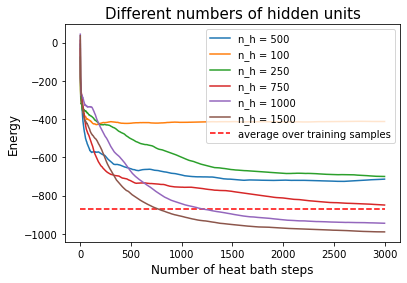

In [766]:
plt.title("Different numbers of hidden units", fontsize="15")

plt.plot(range(RBM_energies[0]['N_heat']), RBM_energies[0]['running average'],
         label="n_h = " + str(RBM_parameters[0]['n_h']))

for i in range(16,21):
    plt.plot(range(RBM_energies[i]['N_heat']), RBM_energies[i]['running average'],
         label="n_h = " + str(RBM_parameters[i]['n_h']))

plt.hlines(RBM_energies[0]['sample average'], 0, RBM_energies[0]['N_heat'],
           color="red", linestyle="dashed", label="average over training samples")
plt.ylabel("Energy", fontsize="12")
plt.xlabel("Number of heat bath steps", fontsize="12")
plt.legend()

plt.show()

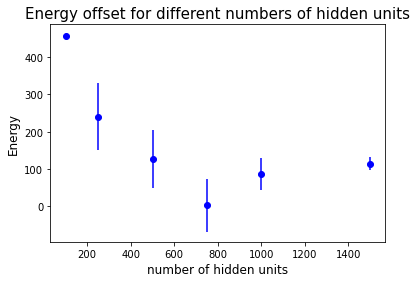

In [768]:
plt.title("Energy offset for different numbers of hidden units", fontsize="15")

plt.errorbar(RBM_parameters[0]['n_h'], np.abs(RBM_sanity[0]['offset average']), 
                yerr=RBM_sanity[0]['offset error'], fmt="o", color="blue")

for i in range(16, 21):
    plt.errorbar(RBM_parameters[i]['n_h'], np.abs(RBM_sanity[i]['offset average']), 
                yerr=RBM_sanity[i]['offset error'], fmt="o", color="blue")

plt.ylabel("Energy", fontsize="12")
plt.xlabel("number of hidden units", fontsize="12")

plt.show()

We find a minimum around 750 hidden units, namely when the number of hidden units is roughly equal to the number of visible units.

In [761]:
#sixth round, Exodia RBM

start = time.process_time()

#save parameters
bs=20
parameters = {'n_v':28**2, 'n_h':28**2, 'bs':bs, 'Nb':int(N_samples2/bs), 'epochs':80, 'w':0.05/bs, 'sigmaJ':0.1, 'k':3}
RBM_parameters.append(parameters)

#initialise weights/couplings J using normal distribution, and biases/fields here
weights_biases = defaultdict(list)
weights_biases['weights'], weights_biases['v_bias'], weights_biases['h_bias'] = initialise(parameters, configurations2)

#save trained weights and biases
RBM_weights_biases.append(train(configurations2, parameters, weights_biases, output=False))

#save training time
RBM_time.append(time.process_time() - start)

#save energies
RBM_energies.append(moving_average_energy(configurations, RBM_weights_biases[-1], RBM_parameters[-1], N_heat=3000))

#sanity check
RBM_sanity.append(sanity_check(RBM_parameters[-1], RBM_weights_biases[-1], configurations))


print("\nHow long the process took (system + CPU user time): " + str((time.process_time() - start)/60) + " min")

===================================  training  ===================================
parameters: {'n_v': 784, 'n_h': 784, 'bs': 20, 'Nb': 1000, 'epochs': 80, 'w': 0.0025, 'sigmaJ': 0.1, 'k': 3}


===================================  complete  ===================================

Energy error after 3000 heat bath steps: -7.0082666666666


Sanity check for learning rate: w = 0.0025, rate = 0.05
averge energy offset: -4.614844444444399±25.208623462636506


How long the process took (system + CPU user time): 2100.925 min


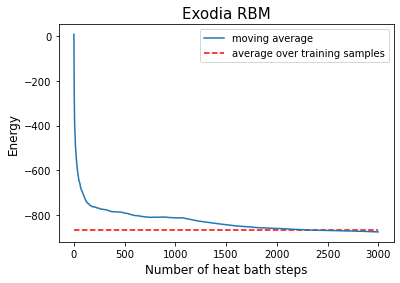

In [776]:
plt.title("Exodia RBM", fontsize="15")

plt.plot(range(RBM_energies[-1]['N_heat']), RBM_energies[-1]['running average'],
         label="moving average")

plt.hlines(RBM_energies[-1]['sample average'], 0, RBM_energies[-1]['N_heat'],
           color="red", linestyle="dashed", label="average over training samples")
plt.ylabel("Energy", fontsize="12")
plt.xlabel("Number of heat bath steps", fontsize="12")
plt.legend()

plt.show()

Combining the knowledge from our previous observations it was time to train the ultimate Exodia RBM and to see how close we could get to a properly thermalising system. Based on the exploration of parameter space conducted, we chose the number of hidden units to equal the number of visible units at 784, we also chose to use all 20000 samples we generated and to train for 80 epochs at a learning rate of 0.05 (or rather at 4 "epochs x learning rate").

In fact this result is impressive, we achive a final average energy offset across 15 heat bath runs, after 3000 steps each:

$dE = -5 ± 25 $

Note: I do not trust my own results, it seems that they fluctuate a lot across multiple iterations of the training. Since my code is very slow (no parallel computing, no C) it was not possible to thoroughly investigate this phenomenon and this leaves a bad taste behind. To improve this homework/to investigate the phenomenon mentioned, I would suggest using a smaller grid, of the order 8x8 and to compare the results obtained against some fast library like sklearn.neural_network.BernoulliRBM (although it does not allow for a custom initial set of weights and biases, otherwise I would have used it to check the results of this homework and maybe investigate the inherent randomness of training observed here).